In [201]:
from sympy import *
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex, gamma_trace
from sympy.tensor.tensor import tensor_indices
from sympy.physics.hep.gamma_matrices import kahane_simplify
from sympy.physics.matrices import mgamma
from einsteinpy.symbolic.predefined import Schwarzschild 
from einsteinpy.symbolic import ChristoffelSymbols, RiemannCurvatureTensor, Tensor, BaseRelativityTensor, GenericVector, MetricTensor
#from einsteinpy.symbolic.tensor import tensor_product
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, tensor_indices
import numpy as np

i,j = tensor_indices('i,j', LorentzIndex)
init_printing(use_unicode=True)
f, theta, phi, u_0, t, c, hbar, m_ = symbols("f theta phi u_0 t c hbar m", real=True)
r = symbols("r", positive=True)
r_s,M ,R= symbols("r_s M R")
u_t , u_r , u_theta, u_phi = symbols("u_t u_r u_\\theta u_\phi", cls=Function)
f,r,theta, phi, hbar

define $\eta^{ab}:= $ eta  (mostly plus)\
and $E_{\alpha}^{\ \  \ a}:= E^\top$,
$e_a^{\ \ \ \alpha}:= e^\top$   such that $e_0^{\ \ \ \alpha}= u^\alpha $

In [202]:
eta = Matrix([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

#r_s = 0

g_t = -(1-r_s/r)
g_r = 1/(1-r_s/r)

#g_r = (1 + r_s/r)



g_theta = r**2
g_phi = r**2 * sin(theta)**2

u_t = u_t(t,r,phi)
u_r = u_r(t,r,phi)
#u_r = 0

u_phi = u_phi(t,r,phi)
u_theta = u_theta(t,r,phi)
#u_phi = 0


N_1 = sqrt(g_r + u_r**2 * g_r**2)
#N_1 = g_r + u_r**2 * g_r**2


a = g_phi * u_phi - (g_phi * u_phi*u_r**2 * g_r**2)/N_1
b = (g_phi * u_r * g_r * u_phi)/N_1
N_2 = sqrt(g_phi*(1+ 2*a*u_phi) - g_r*b*(b + 2*a*u_r)- a**2)


#u_theta = 0
# u^2 = -1 => u_t = something

#and set theta = pi/2

u_t = sqrt(r*(r**3*u_phi**2 - r**2*r_s*u_phi**2 + r*u_r**2 + r - r_s))/(r - r_s)


c = symbols("c", cls=Function)
c = c(t,r,phi,theta)


e_ = Matrix([[u_t, (u_r*u_t*g_r)/N_1,0,a*u_t/N_2],[u_r,( 1+ u_r**2 * g_r)/N_1,0,(a*u_r - b)/N_2],[0,0,1/sqrt(g_theta),0],[u_phi, (u_phi*u_r*g_r)/N_1,0,(1+a*u_phi)/N_2]])


#e_ = simplify(e_.T)
e = e_.T

In [154]:
#e_

⎡           _________________________                                         
⎢          ╱     2                                                            
⎢     √r⋅╲╱  r⋅uᵣ (t, r, φ) + r - rₛ                                          
⎢     ───────────────────────────────                        uᵣ(t, r, φ)      
⎢                  r - rₛ                                                     
⎢                                                                             
⎢     _________________________                                               
⎢    ╱     2                                               2                  
⎢r⋅╲╱  r⋅uᵣ (t, r, φ) + r - rₛ ⋅uᵣ(t, r, φ)            r⋅uᵣ (t, r, φ) + r - rₛ
⎢──────────────────────────────────────────  ─────────────────────────────────
⎢      _________________________                      ________________________
⎢     ╱     2                                        ╱     2                  
⎢    ╱  r⋅uᵣ (t, r, φ) + r - rₛ          2          

In [203]:
g = Matrix([[g_t, 0,0,0],[0,g_r,0,0],[0,0,g_theta,0],[0,0,0,g_phi]])
g

⎡     rₛ                        ⎤
⎢-1 + ──    0     0       0     ⎥
⎢     r                         ⎥
⎢                               ⎥
⎢           1                   ⎥
⎢   0     ──────  0       0     ⎥
⎢             rₛ                ⎥
⎢         1 - ──                ⎥
⎢             r                 ⎥
⎢                               ⎥
⎢                  2            ⎥
⎢   0       0     r       0     ⎥
⎢                               ⎥
⎢                      2    2   ⎥
⎣   0       0     0   r ⋅sin (θ)⎦

In [204]:
#simplify(e_@g@e_.T).subs(theta,pi/2)

$\newcommand{\overbar}[1]{\mkern 1.5mu\overline{\mkern-1.5mu#1\mkern-1.5mu}\mkern 1.5mu}\textbf{}$

$\delta v_\alpha = \frac{\hbar}{m i } \overbar{\Psi}_0^{(\sigma)} \Gamma_\alpha \Psi_0^{(\sigma)}$ \
$\delta v_\alpha = \frac{\hbar}{m i } \frac{-1}{2}\overbar{\Psi}_0^{(\sigma)} \omega_{\alpha a b}\Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)}$ \
$\delta v_\alpha = -\frac{\hbar}{2m i } \omega_{\alpha a b}\overbar{\Psi}_0^{(\sigma)} \Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)}$
$:= -\frac{\hbar}{2m i } \omega_{\alpha a b}\Sigma^{ab}$

$\Sigma^{ab} = \overbar{\Psi}_0^{(\sigma)} \Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)} =  \frac{1}{4}\overbar{\Psi}_0^{(\sigma)} \left[ \gamma^a, \gamma^b\right]\Psi_0^{(\sigma)}$

In [205]:
xi = symbols("\\xi", real=True)
chi = symbols("\\chi", real=True)

def commutator(a,b):
    return mgamma(a)@mgamma(b) - mgamma(b)@mgamma(a)

def Sigma(a,b):
    #psi = Matrix([[cos(xi/2),exp(I*chi)*sin(xi/2),0,0]]).T
    psi = Matrix([[1,0,0,0]]).T #z-direction
    #psi = Matrix([[0,1,0,0]]).T
    #psi = Matrix([[1/sqrt(2), I*1/sqrt(2),0,0]]) #y-direction
    #psi = Matrix([[1/sqrt(2), -1/sqrt(2),0,0]]).T

    return conjugate(psi).T@mgamma(0)@commutator(a,b)@psi/4

def Sigma_as_Matrix():
    s = zeros(4)
    for i in range(4):
        for j in range(4):
            s[i,j] = Sigma(i,j)
    return s


Sigma_ab = Sigma_as_Matrix()
simplify(Sigma_ab)


⎡0  0   0   0⎤
⎢            ⎥
⎢      -ⅈ    ⎥
⎢0  0  ───  0⎥
⎢       2    ⎥
⎢            ⎥
⎢   ⅈ        ⎥
⎢0  ─   0   0⎥
⎢   2        ⎥
⎢            ⎥
⎣0  0   0   0⎦

In [206]:
g_ = MetricTensor(g.tolist(),syms=[t,r,theta,phi], config='ll', name="ss-metric") 
ch = ChristoffelSymbols.from_metric(g_)
ch = ch.change_config("ull")

In [184]:
type(u_t), type(u_r),type(u_phi) , type(u_theta)

(sympy.core.mul.Mul, u_r, u_\phi, u_\theta)

In [47]:
#du_dtau =  tensor_product(tensor_product(ch.change_config('ull'),u.change_config('u'), 1,0), u.change_config('u'),1,0)
#print(simplify(du_dtau.tensor()*(-1)))

In [207]:
Lorentz = TensorIndexType('Lorentz', dummy_name='L')
Global = TensorIndexType('Global', dummy_name='G')
a, b, c, d = tensor_indices('a b c d', Lorentz)
alpha, beta, mu, nu= tensor_indices('alpha beta mu nu', Global)

#E = TensorHead('E', [Global, Lorentz])
e = TensorHead('e', [Lorentz, Global])
Gamma = TensorHead('Gamma', [Global, Global, Global])
sigma = TensorHead('sigma', [Lorentz, Lorentz])

minkowski_m = TensorHead('eta', [Lorentz, Lorentz])
schwarzschild_m = TensorHead('g', [Global, Global])

x = TensorHead('x', [Global])

u = TensorHead('u', [Global])

repl = {}
repl[Lorentz] = eta.tolist()
repl[Global] = g_.tensor().tolist()

repl[x(mu)] = [t, r, theta, phi]

repl[u(mu)] = [u_t, u_r, 0,u_phi]



repl[e(-a, alpha)] = (e_).tolist()
repl[Gamma(alpha, -mu, -nu)] = ch.tensor().tolist()
repl[sigma(a, b)] = Sigma_ab.tolist()
repl[minkowski_m(-a, -b)] = eta.tolist()
repl[schwarzschild_m(-mu, -nu)] = g_.tensor().tolist()







In [208]:
from sympy.tensor.toperators import PartialDerivative
E = schwarzschild_m(-nu, -alpha)*e(-a, alpha)*minkowski_m(a, b)


$\omega_{\mu a b} = \Gamma^\alpha_{\ \ \ \nu \mu}e_a^{\ \ \  \nu}E_\alpha^{\ \  \ c}\eta_{b c}      - \partial_\mu (E_\alpha^{\ \ \ \ c})e_a^{\  \ \ \alpha}\eta_{b c}  $ 

In [209]:
#omega_1 = PartialDerivative(E(-alpha, c), x(mu))*e(-a, alpha)*minkowski_m(-b, -c)
omega = Gamma(alpha, -nu, -mu)*e(-a, nu)*E(-alpha, c)*minkowski_m(-b, -c) - PartialDerivative(E(-alpha, c), x(mu))*e(-a, alpha)*minkowski_m(-b, -c)

/tmp/ipykernel_92320/3433138348.py:2: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  omega = Gamma(alpha, -nu, -mu)*e(-a, nu)*E(-alpha, c)*minkowski_m(-b, -c) - PartialDerivative(E(-alpha, c), x(mu))*e(-a, alpha)*minkowski_m(-b, -c)


In [210]:
omega_sigma = omega(-mu, -a, -b)*sigma(a, b)
omega_sigma

/tmp/ipykernel_92320/2013430191.py:1: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  omega_sigma = omega(-mu, -a, -b)*sigma(a, b)


In [225]:

dv = Matrix(omega_sigma.replace_with_arrays(repl, [mu]).tolist())/(-2*m_*I)
dv = simplify(dv.subs(theta,pi/2))


In [214]:
#taylor expansion in r_s
simplify((dv.subs(r_s, 0) + dv.diff(r_s).subs(r_s, 0)*r_s).subs(sqrt(r**2), r).subs(theta,pi/2))

⎡             0              ⎤
⎢                            ⎥
⎢             0              ⎥
⎢                            ⎥
⎢    ⎛  2             ⎞      ⎥
⎢2⋅r⋅⎝uᵣ (t, r, φ) + 1⎠ - rₛ ⎥
⎢────────────────────────────⎥
⎢          __________________⎥
⎢     3   ╱   2              ⎥
⎢4⋅m⋅r ⋅╲╱  uᵣ (t, r, φ) + 1 ⎥
⎢                            ⎥
⎣             0              ⎦

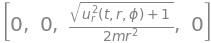

In [224]:
dv_ = simplify(dv.subs(r_s, 0).subs(sqrt(r**2), r)).subs(theta, pi/2)
dv = TensorHead('eta', [Global])
repl[dv(mu)] = (dv_.T).tolist()[0]

Gamma(mu, -alpha, -beta)*u(beta)*dv(alpha)

AttributeError: 'TensorHead' object has no attribute 'T'

In [192]:
du_dtau = Gamma(alpha, -nu, -mu)*u(nu)*u(mu)
du_dtau.replace_with_arrays(repl,[alpha]).subs(r_s, 0).subs(theta, pi/2)

⎡            2              2⋅u_\phi(t, r, φ)⋅uᵣ(t, r, φ)⎤
⎢0  -r⋅u_\phi (t, r, φ)  0  ─────────────────────────────⎥
⎣                                         r              ⎦

In [ ]:
v_local = dv_(mu)*E(-mu, a)
j = Matrix(u.replace_with_arrays(repl, [a])) + Matrix(v_local.replace_with_arrays(repl, [a]))
j_ = TensorHead("j", [Lorentz])
repl[j_(a)] = j.T.tolist()[0]
result = j_(a)*E_inv(-a, mu)
simplify(result.replace_with_arrays(repl, [mu]))

⎡                       ________        ⎤
⎢                      ╱     rₛ         ⎥
⎢                     ╱  1 - ──         ⎥
⎢                   ╲╱       r          ⎥
⎢uₜ  uᵣ  u_\theta + ────────────  u_\phi⎥
⎢                           2           ⎥
⎣                      4⋅m⋅r            ⎦

In [ ]:
rieman = RiemannCurvatureTensor.from_metric(g_)
rieman.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎥
⎢                                                      ⎥
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢ 

In [ ]:
u_2 = tensor_product(u,u.change_config('l'), 0,0)

print(u_2.tensor())


(r**3*(r - r_s)*(u_\theta**2 + u_phi**2*sin(theta)**2) + r**2*u_r**2 - u_t**2*(r - r_s)**2)/(r*(r - r_s))


In [ ]:
u_2_expr = (r**3*(r - r_s)*(u_theta**2 + u_phi**2*sin(theta)**2) + r**2*u_r**2 - u_t**2*(r - r_s)**2)/(r*(r - r_s))
print(solve(u_2_expr + 1, u_t))

[-sqrt(r*(r**3*u_\theta**2 + r**3*u_phi**2*sin(theta)**2 - r**2*r_s*u_\theta**2 - r**2*r_s*u_phi**2*sin(theta)**2 + r*u_r**2 + r - r_s))/(r - r_s), sqrt(r*(r**3*u_\theta**2 + r**3*u_phi**2*sin(theta)**2 - r**2*r_s*u_\theta**2 - r**2*r_s*u_phi**2*sin(theta)**2 + r*u_r**2 + r - r_s))/(r - r_s)]


In [ ]:
rieman = RiemannCurvatureTensor.from_metric(g_)
sig = BaseRelativityTensor(sigma,syms=[t,r,theta,phi], config="uu", name="sigma", parent_metric=m)
sig.tensor()

NameError: name 'sigma' is not defined

In [ ]:

contraction = tensorcontraction(tensor_product(tensor_product(rieman.change_config("llll"),u, 1,0),sig,1,0,).tensor(),(1,2))
#contraction.tensor()

In [ ]:
a = GenericVector(contraction.subs(f,1-r_s),syms=[t,r,theta,phi], config='l', name="acceleration", parent_metric=m)

In [ ]:
a = a.change_config('u')
print(a.tensor())

[0, -r_s*u_\theta*sqrt(1 - r_s)/r**2, r_s*u_r*sqrt(1 - r_s)/(r**3*(r - r_s)), 0]


In [ ]:
R = 6371
l = 100

x = np.sqrt(R**2 + l**2) - R
x

In [ ]:
2/3 * 1E-8 / 6.58E-16

In [ ]:
E = 2.4*1E6
m = 1.5E-6

alpha = E**2/m**2



beta = np.sqrt((alpha-1)/(alpha+2))
beta